# Notebook to plot average NDVI values over time

This notebook shows plot 6.

In [1]:
import seaborn as sns

%matplotlib inline
sns.set(context='paper', font='Fira Sans Extra Condensed', style='ticks', palette='Accent', font_scale=1.2)
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.font_manager._rebuild()

In [2]:
from pandas import read_csv

In [3]:
path_to_results = 'results/'

In [6]:
from pandas import read_csv
df_1 = read_csv('data/processed/df_final_1.csv', parse_dates=['dates'])
df_2 = read_csv('data/processed/df_final_2.csv', parse_dates=['dates'])

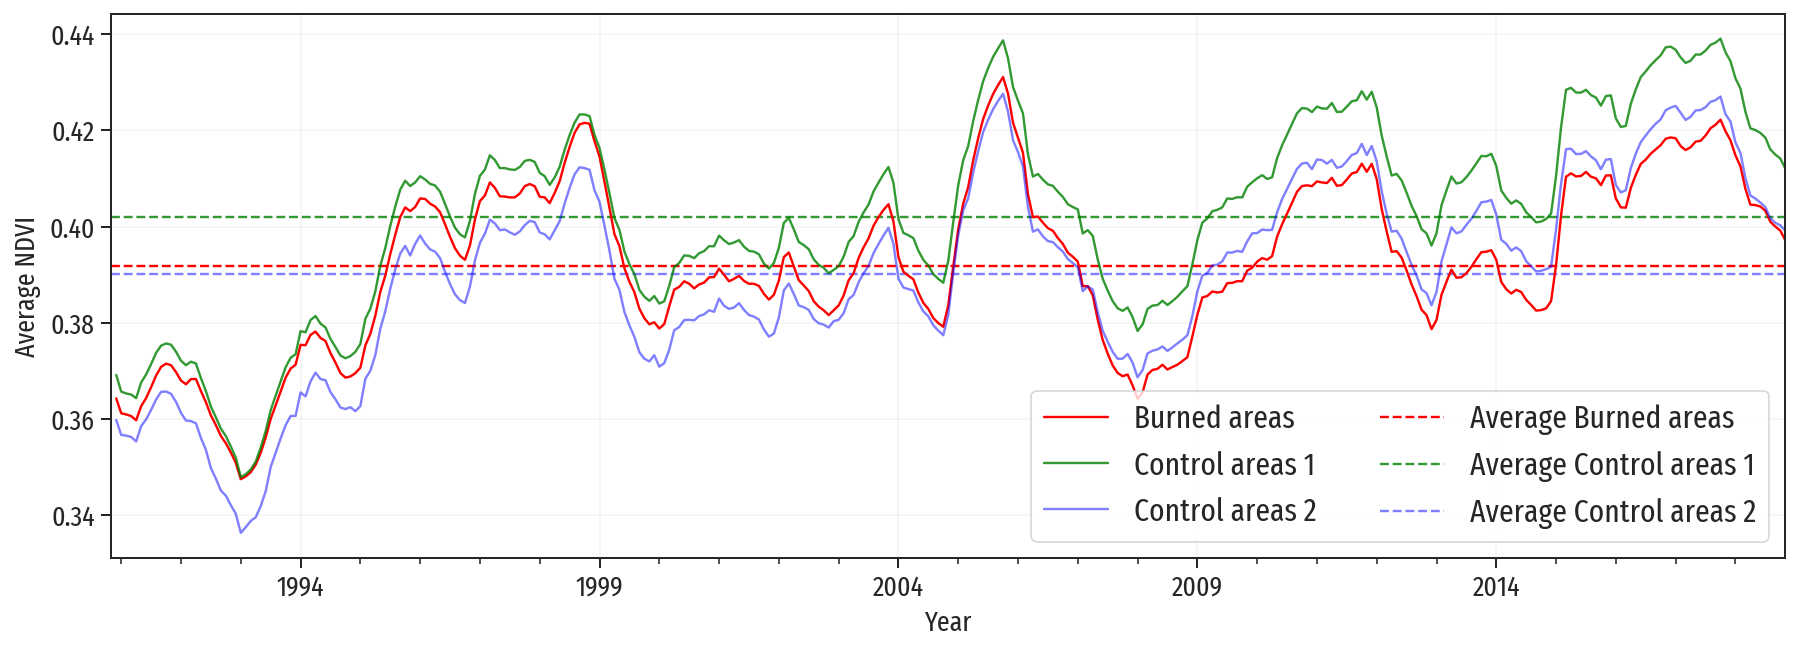

In [7]:
import matplotlib.pyplot as plt
from pandas import date_range

fig, ax = plt.subplots(figsize=(15,5))
df_1[df_1.ID_new.str.endswith('A')].groupby(['dates', 'ID_new'])['values_ndvi'].mean().unstack(1).interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).rolling(window=12).mean().plot(ax=ax, color='red', label='Burned areas')
plt.hlines(df_1[df_1['ID_new'].str.endswith('A')].groupby(['dates', 
                                                           'ID_new'])['values_ndvi'].mean().unstack(1)\
           .interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).mean(), 
           250, 588, color='red', linestyle='--', label='Average Burned areas')
df_1[df_1.ID_new.str.endswith('C1')].groupby(['dates', 'ID_new'])['values_ndvi'].mean().unstack(1).interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).rolling(window=12).mean().plot(ax=ax, color='green', alpha=.8, label='Control areas 1')
plt.hlines(df_1[df_1['ID_new'].str.endswith('C1')].groupby(['dates', 
                                                           'ID_new'])['values_ndvi'].mean().unstack(1)\
           .interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).mean(), 
           250, 588, color='green', linestyle='--', alpha=.8, label='Average Control areas 1')
df_2[df_2.ID_new.str.endswith('C2')].groupby(['dates', 'ID_new'])['values_ndvi'].mean().unstack(1).interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).rolling(window=12).mean().plot(ax=ax, color='blue', alpha=.5, label='Control areas 2')
plt.hlines(df_2[df_2['ID_new'].str.endswith('C2')].groupby(['dates', 
                                                           'ID_new'])['values_ndvi'].mean().unstack(1)\
           .interpolate().fillna(method='ffill').resample('M').mean().mean(axis=1).mean(), 
           250, 588, color='blue', linestyle='--', alpha=.5, label='Average Control areas 2')
for r in range(1):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)
        
plt.xlim([250, 586])
plt.ylabel('Average NDVI')
plt.xlabel('Year')
plt.grid(True, alpha=.2)
plt.legend(fontsize=16, ncol=2)
plt.show()
fig.savefig(path_to_results+'Average_NDVI_over_time_AOIS.png',
        dpi=400,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})


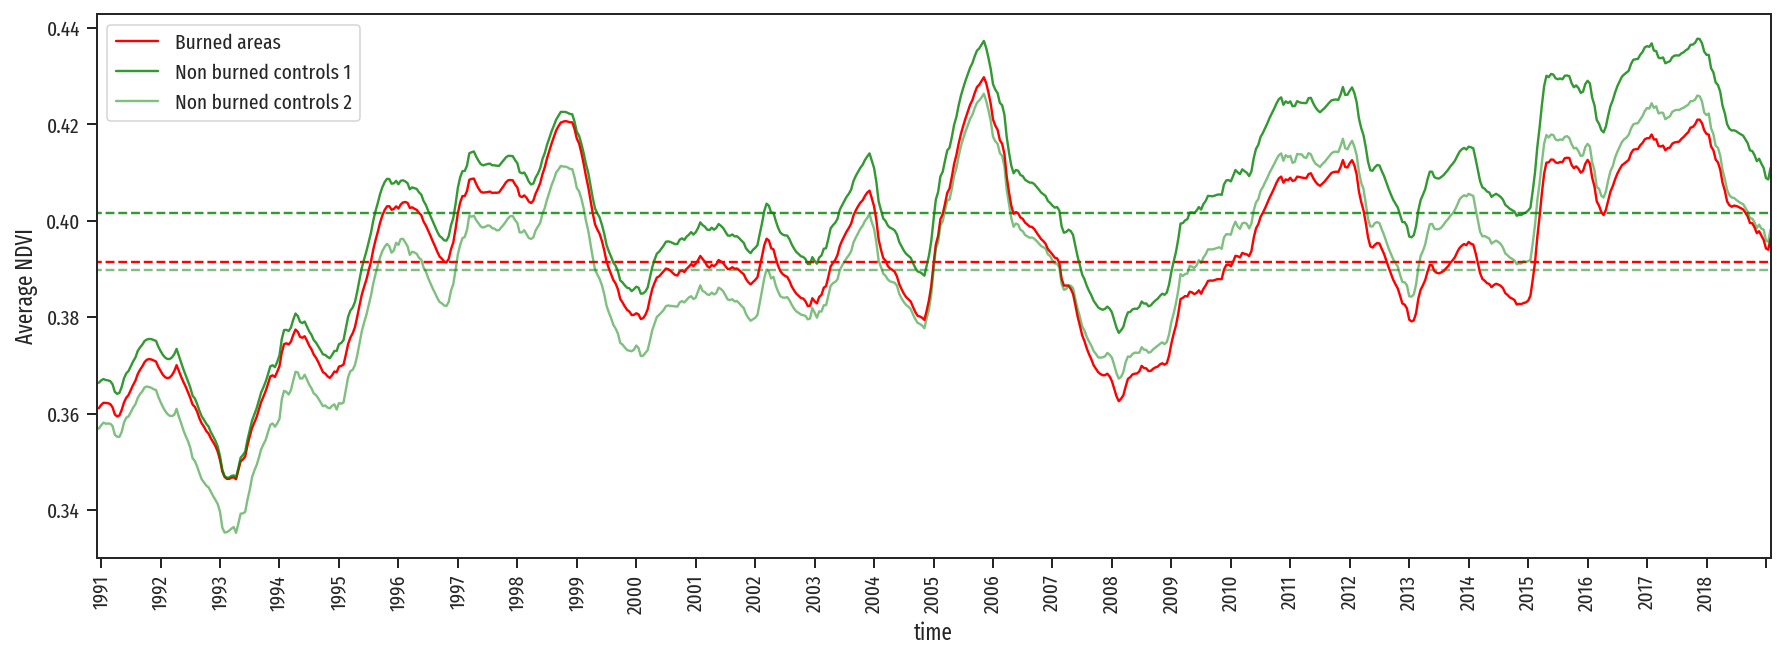

In [8]:
fig = plt.figure(figsize=(15, 5))
df_1[df_1['ID_new'].str.endswith('A')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).rolling(window=26).mean().plot(label='Burned areas', color='red')
plt.hlines(df_1[df_1['ID_new'].str.endswith('A')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).mean(), 1, 757, color='red', linestyle='--')
df_1[df_1['ID_new'].str.endswith('C1')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).rolling(window=26).mean().plot(label='Non burned controls 1', color='green', alpha=.8)
plt.hlines(df_1[df_1['ID_new'].str.endswith('C1')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).mean(), 1, 757, color='green', linestyle='--', alpha=.8)
df_2[df_2['ID_new'].str.endswith('C2')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).rolling(window=26).mean().plot(label='Non burned controls 2', color='green', alpha=.5)
plt.hlines(df_2[df_2['ID_new'].str.endswith('C2')].groupby(['ID', 'time'])['values_ndvi'].first().unstack(0).interpolate().fillna(method='ffill').fillna(method='bfill').mean(axis=1).mean(), 1, 757, color='green', linestyle='--', alpha=.5)
plt.xticks(ticks=list(range(1, 757, 26)), 
           labels=[d.strftime('%Y') for d in date_range(start='1990-01-01', end='2019-12-01', freq='Y')], rotation=90)
plt.ylabel('Average NDVI')
plt.xlim([25, 757])
plt.legend()
plt.show()

fig.savefig(path_to_results+'Average_NDVI_over_time_AOIS_with_xticks.png',
        dpi=400,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})